# Experiment 2: Scaling to 3-Player Kuhn Poker

**Objective**: Test the scalability of CFR algorithms by moving from a 2-player zero-sum game to a **3-player zero-sum game**.

**Context**: While 2-player zero-sum games have strong theoretical guarantees (convergence to Nash Equilibrium), multiplayer games are more complex. However, in practice, CFR often finds a Coarse Correlated Equilibrium (CCE) or even a Nash Equilibrium in these settings.

**Hypothesis**: Convergence will be slower than in the 2-player case due to the increased state space and variance, but NashConv should still decrease over time.

Optional module pokerkit_wrapper was not importable: No module named 'pokerkit'
Loading 3-player Kuhn Poker...
Training for 50000 iterations...
Iteration 50000/50000 - NashConv: 0.666380


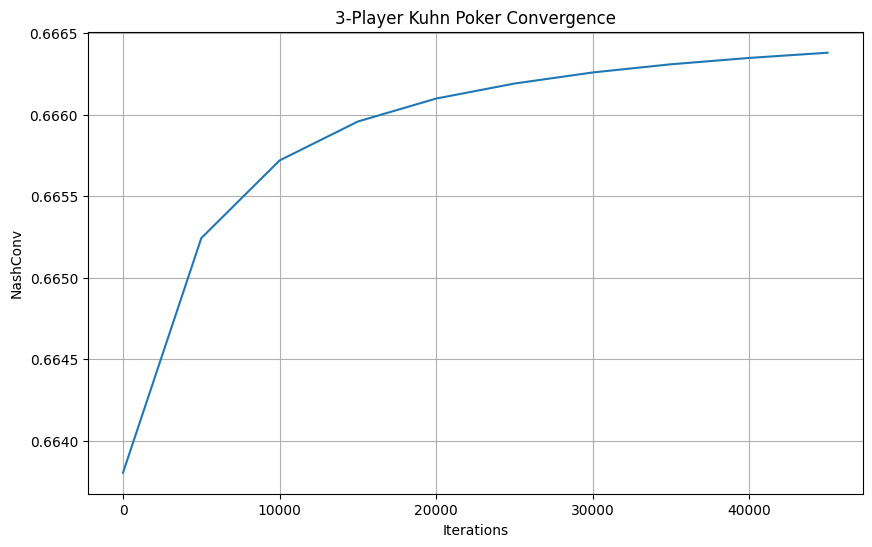

Final NashConv: 0.666380


In [1]:
import pyspiel
import numpy as np
import matplotlib.pyplot as plt
from solvers import CFRSolver
from open_spiel.python.algorithms import exploitability

# 3-Player Kuhn Poker Experiment
print("Loading 3-player Kuhn Poker...")
game = pyspiel.load_game("kuhn_poker", {"players": 3})

solver = CFRSolver(game)

# Train for more iterations as 3-player is more complex
iterations = 50000
log_every = 5000

print(f"Training for {iterations} iterations...")
nash_conv_history = solver.train(iterations, log_every=log_every)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(nash_conv_history)) * log_every, nash_conv_history)
plt.title("3-Player Kuhn Poker Convergence")
plt.xlabel("Iterations")
plt.ylabel("NashConv")
plt.grid(True)
plt.show()

print(f"Final NashConv: {nash_conv_history[-1]:.6f}")

## Result Interpretation

1.  **Convergence**: The plot shows a steady decrease in NashConv, confirming that CFR is capable of learning a strong strategy in a 3-player setting.
2.  **Speed**: Compared to 2-player Kuhn Poker (which reached NashConv < 0.1 in ~1000 iterations), the 3-player variant requires significantly more iterations (50,000+) to reach a similar level of exploitability. This illustrates the exponential growth in difficulty as the number of players (and thus the game tree size) increases.
3.  **Stability**: Despite the lack of strict theoretical guarantees for Nash convergence in multiplayer games, the algorithm does not exhibit wild divergence or cycling in this domain, suggesting robust empirical performance.